<a href="https://colab.research.google.com/github/robinpats182/Computer-Vision-CNN-Essentials/blob/main/CNN_FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Map for Fashion MNIST classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

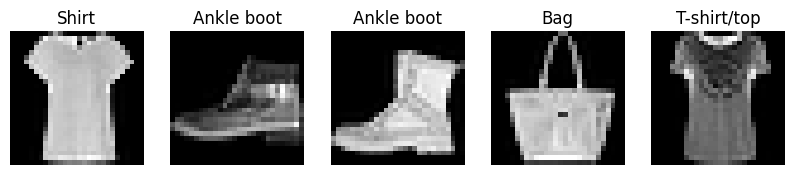

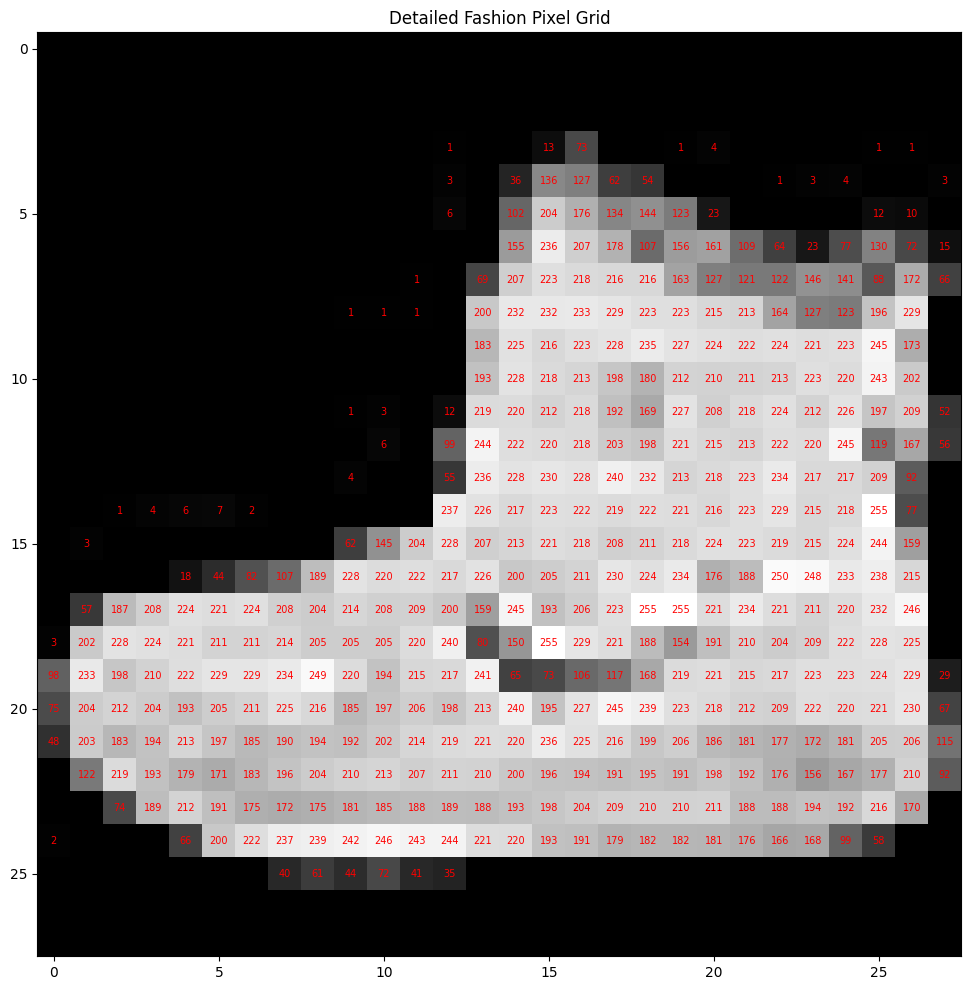

In [ ]:
# 1.1 Show Random Samples
plt.figure(figsize=(10, 4))
for i in range(5):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')
plt.show()

# 1.2 Grid View with Pixel Values (0-255)
def plot_pixel_grid(img):
    plt.figure(figsize=(12, 12))
    plt.imshow(img, cmap='gray')
    for (j, i), val in np.ndenumerate(img):
        # Only show values > 0 to keep the grid clean
        if val > 0:
            plt.text(i, j, str(val), ha='center', va='center', color='red', fontsize=7)
    plt.title("Detailed Fashion Pixel Grid")
    plt.show()

plot_pixel_grid(x_train[0])

# Normalization
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# Model A: Simple 3-Layer CNN
model_6 = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), padding='same',  activation='relu'),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (3, 3), padding='same',  activation='relu'),
    layers.Conv2D(4, (3, 3), padding='same',  activation='relu'),
    layers.Conv2D(2, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Training
model_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h6 = model_6.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6946 - loss: 0.8739 - val_accuracy: 0.8514 - val_loss: 0.4112
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8571 - loss: 0.3834 - val_accuracy: 0.8670 - val_loss: 0.3683
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8735 - loss: 0.3355 - val_accuracy: 0.8700 - val_loss: 0.3412
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8913 - loss: 0.2994 - val_accuracy: 0.8826 - val_loss: 0.3162
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8960 - loss: 0.2795 - val_accuracy: 0.8894 - val_loss: 0.3052
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9024 - loss: 0.2630 - val_accuracy: 0.8884 - val_loss: 0.3045
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9094 - loss: 0.2442 - val_accuracy: 0.8892 - val_loss: 0.2970
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9112 - loss: 0.2345 - val_accuracy: 

In [ ]:
# Model B: Deep 8-Layer CNN (Heavy Architecture)
model_12 = models.Sequential([
    layers.Conv2D(64, (5, 5), padding='same', activation='leaky_relu', input_shape=(28, 28, 1)), # Layer 1
    layers.Conv2D(32, (5, 5), activation='leaky_relu'),                                         # Layer 2
    layers.Conv2D(16, (5, 5), activation='leaky_relu'),                                         # Layer 2
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='leaky_relu'),                        # Layer 3
    layers.Conv2D(64, (3, 3), activation='leaky_relu'),                                        # Layer 4
    layers.Conv2D(32, (3, 3), activation='leaky_relu'),                                        # Layer 4
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (2, 2), activation='leaky_relu'),                                        # Layer 5
    layers.Conv2D(32, (2, 2), activation='leaky_relu'),                                        # Layer 5
    layers.Flatten(),
    layers.Dense(142, activation='leaky_relu'),                                                 # Layer 6
    layers.Dense(128, activation='leaky_relu'),                                                 # Layer 7
    layers.Dense(46, activation='leaky_relu'),                                                 # Layer 7
    layers.Dense(0, activation='softmax')                                                # Layer 8
])

model_12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h12 = model_6.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9560 - loss: 0.1173 - val_accuracy: 0.9077 - val_loss: 0.3067
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9592 - loss: 0.1109 - val_accuracy: 0.9083 - val_loss: 0.3264
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9590 - loss: 0.1089 - val_accuracy: 0.9083 - val_loss: 0.3257
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9607 - loss: 0.1034 - val_accuracy: 0.9098 - val_loss: 0.3350
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9608 - loss: 0.1024 - val_accuracy: 0.9083 - val_loss: 0.3378
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9629 - loss: 0.0982 - val_accuracy: 0.9095 - val_loss: 0.3552
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9644 - loss: 0.0938 - val_accuracy: 0.9048 - val_loss: 0.3734
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9634 - loss: 0.0976 - val_accuracy: 0.

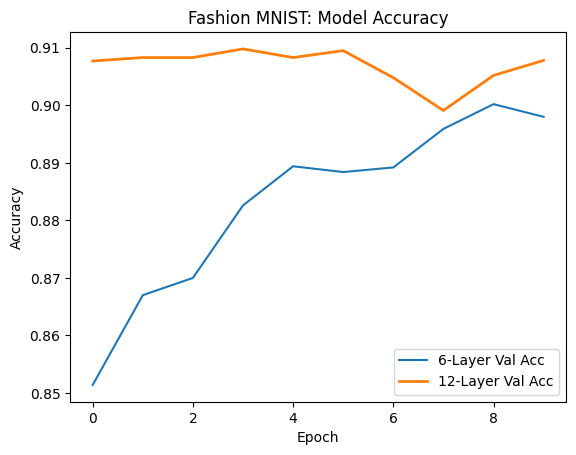

In [ ]:
# Plotting Accuracy
plt.plot(h6.history['val_accuracy'], label='6-Layer Val Acc')
plt.plot(h12.history['val_accuracy'], label='12-Layer Val Acc', linewidth=2)
plt.title('Fashion MNIST: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()